<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#参考思路" data-toc-modified-id="参考思路-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>参考思路</a></span></li><li><span><a href="#商品销售静态分析" data-toc-modified-id="商品销售静态分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>商品销售静态分析</a></span></li><li><span><a href="#商品销售动态分析" data-toc-modified-id="商品销售动态分析-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>商品销售动态分析</a></span><ul class="toc-item"><li><span><a href="#订单数量趋势分析" data-toc-modified-id="订单数量趋势分析-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>订单数量趋势分析</a></span></li><li><span><a href="#订单金额趋势分析" data-toc-modified-id="订单金额趋势分析-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>订单金额趋势分析</a></span></li><li><span><a href="#异常值检测" data-toc-modified-id="异常值检测-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>异常值检测</a></span></li></ul></li><li><span><a href="#用户消费行为静态分析" data-toc-modified-id="用户消费行为静态分析-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>用户消费行为静态分析</a></span><ul class="toc-item"><li><span><a href="#用户购买数量分析" data-toc-modified-id="用户购买数量分析-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>用户购买数量分析</a></span><ul class="toc-item"><li><span><a href="#累计购买数量" data-toc-modified-id="累计购买数量-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>累计购买数量</a></span></li><li><span><a href="#购买数量贡献" data-toc-modified-id="购买数量贡献-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>购买数量贡献</a></span></li><li><span><a href="#最大单笔购买数量" data-toc-modified-id="最大单笔购买数量-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>最大单笔购买数量</a></span></li></ul></li></ul></li><li><span><a href="#用户消费行为动态分析" data-toc-modified-id="用户消费行为动态分析-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>用户消费行为动态分析</a></span><ul class="toc-item"><li><span><a href="#第一次购买时间" data-toc-modified-id="第一次购买时间-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>第一次购买时间</a></span></li><li><span><a href="#最后一次购买时间分析" data-toc-modified-id="最后一次购买时间分析-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>最后一次购买时间分析</a></span></li><li><span><a href="#生命周期分析" data-toc-modified-id="生命周期分析-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>生命周期分析</a></span></li><li><span><a href="#首次回购周期" data-toc-modified-id="首次回购周期-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>首次回购周期</a></span></li></ul></li></ul></div>

# 参考思路

![](参考思路.png)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_table("CDNOW.txt", sep='\s+', header=None)

C:\code\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [20]:
data.head()

,0,1,2,3
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [21]:
col = ['id', 'date', 'amount', 'consumption']

In [22]:
data.columns = col

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
id             69659 non-null int64
date           69659 non-null int64
amount         69659 non-null int64
consumption    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [26]:
data.date.head()

0    19970101
1    19970112
2    19970112
3    19970102
4    19970330
Name: date, dtype: int64

In [28]:
pd.to_datetime(data.date, format="%Y%m%d").head()

0   1997-01-01
1   1997-01-12
2   1997-01-12
3   1997-01-02
4   1997-03-30
Name: date, dtype: datetime64[ns]

In [30]:
data.date = pd.to_datetime(data.date, format="%Y%m%d")

In [31]:
data.head()

,id,date,amount,consumption
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [55]:
data.describe()

,id,amount,consumption
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


# 商品销售静态分析

In [32]:
data.describe()

,id,amount,consumption
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


- 购买数量：绝大多数订单购买量都非常少
- 购买金额：绝大多数也非常少

（本人无疑了）

# 商品销售动态分析

## 订单数量趋势分析

In [38]:
time_key = pd.Grouper(freq='M')

In [46]:
data_month = data.set_index('date').groupby(time_key).sum()

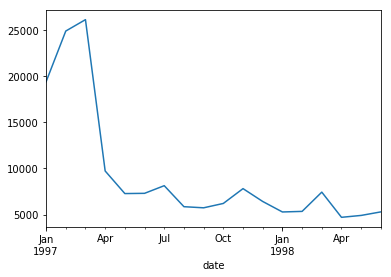

In [50]:
data_month.amount.plot()

高开低走吧，这店凉得挺快的

## 订单金额趋势分析

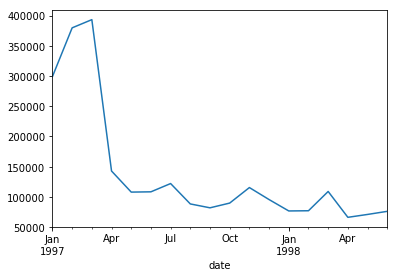

In [51]:
data_month.consumption.plot()

同上...

## 异常值检测

In [60]:
data[data.consumption == 0].groupby('id').sum().describe()

,amount,consumption
count,80.0,80.0
mean,1.0,0.0
std,0.0,0.0
min,1.0,0.0
25%,1.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,0.0


In [71]:
data = data[data.consumption > 0]

In [72]:
data.describe()

,id,amount,consumption
count,69579.000000,69579.000000,69579.000000
mean,11472.165812,2.411662,35.934918
std,6819.453839,2.334775,36.282363
min,1.000000,1.000000,1.630000
25%,5509.000000,1.000000,14.490000
50%,11414.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


天底下竟然有不花钱的消费，难怪凉了...

# 用户消费行为静态分析

## 用户购买数量分析

### 累计购买数量

In [73]:
data_user = data.groupby('id').sum()

In [74]:
data_user.head()

,amount,consumption
id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61


In [75]:
data_user.describe()

,amount,consumption
count,23502.000000,23502.000000
mean,7.139860,106.387356
std,17.004818,241.205819
min,1.000000,3.990000
25%,1.000000,19.990000
50%,3.000000,43.600000
75%,7.000000,106.967500
max,1033.000000,13990.930000


### 购买数量贡献

In [83]:
data_user['consumption_contribtion'] = data_user['consumption'] / data_user['consumption'].sum()

In [84]:
data_user.head()

,amount,consumption,consumption_contribtion
id,,,
16115,1,3.99,0.000002
12752,1,3.99,0.000002
16185,1,3.99,0.000002
12682,1,3.99,0.000002
11442,1,3.99,0.000002


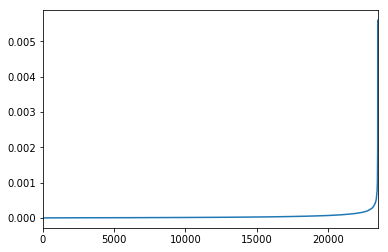

In [112]:
data_user.sort_values('consumption_contribtion').reset_index().consumption_contribtion.plot()

先富啥时候带一带后富

### 最大单笔购买数量

In [116]:
user_max_consumption = data.groupby('id').max()

In [117]:
user_max_consumption.describe()

,amount,consumption
count,23502.000000,23502.000000
mean,2.859757,44.024944
std,2.946856,46.160066
min,1.000000,3.990000
25%,1.000000,15.490000
50%,2.000000,29.980000
75%,4.000000,54.770000
max,99.000000,1286.010000


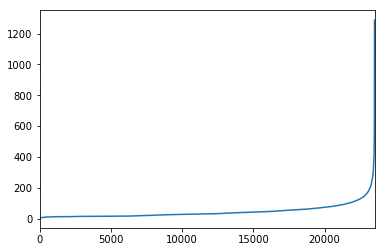

In [267]:
user_max_consumption.consumption.sort_values().reset_index(drop=True).plot()

同上...

# 用户消费行为动态分析

## 第一次购买时间

In [143]:
user_first_shop = data.groupby('id').date.min()

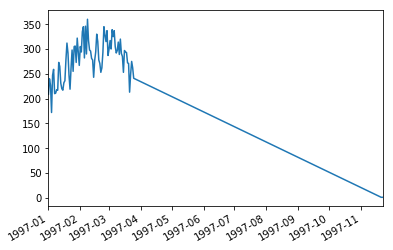

In [141]:
user_first_shop.groupby(user_first_shop.values).count().plot()

## 最后一次购买时间分析

In [144]:
user_last_shop = data.groupby('id').date.max()

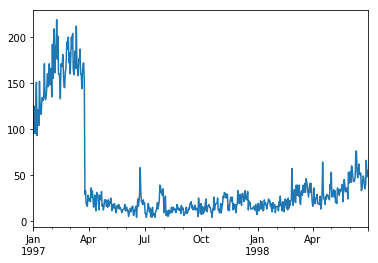

In [145]:
user_last_shop.groupby(user_last_shop.values).count().plot()

## 生命周期分析

In [149]:
f = lambda x: x.max() - x.min()
user_shop_period = data.groupby('id').date.apply(f)

In [154]:
user_shop_period.describe()

count                       23502
mean     135 days 05:35:57.058973
std      180 days 16:31:20.822199
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             295 days 00:00:00
max             544 days 00:00:00
Name: date, dtype: object

只买一次的用户数目惊人...

## 首次回购周期

In [193]:
user_shop_date = data.groupby('id').date.apply(lambda x: x.sort_values())

In [201]:
user_shop_date.head(10)

id   
1   0   1997-01-01
2   1   1997-01-12
    2   1997-01-12
3   3   1997-01-02
    4   1997-03-30
    5   1997-04-02
    6   1997-11-15
    7   1997-11-25
    8   1998-05-28
4   9   1997-01-01
Name: date, dtype: datetime64[ns]

In [239]:
f = lambda x: (x[1] - x[0]) if x.count() > 1 else None
user_first_butback = user_shop_date.groupby('id').apply(f)

In [250]:
user_first_buyback = user_first_butback.dropna()

In [252]:
user_first_buyback.groupby(user_first_buyback.values).count()

0 days      351
1 days      237
2 days      178
3 days      189
4 days      170
5 days      171
6 days      191
7 days      200
8 days      165
9 days      112
10 days     126
11 days     135
12 days     144
13 days     165
14 days     165
15 days     156
16 days     140
17 days     108
18 days     114
19 days     114
20 days     118
21 days     115
22 days      83
23 days      99
24 days      85
25 days      98
26 days      78
27 days      92
28 days      97
29 days      76
           ... 
489 days      5
490 days      1
491 days      1
492 days      1
493 days      1
494 days      3
495 days      1
496 days      1
497 days      3
499 days      1
501 days      3
502 days      1
503 days      2
505 days      1
506 days      1
508 days      1
509 days      1
512 days      2
513 days      3
514 days      2
515 days      1
516 days      3
517 days      1
520 days      2
522 days      1
524 days      1
525 days      1
528 days      1
532 days      2
533 days      1
Name: date, Length: 517,

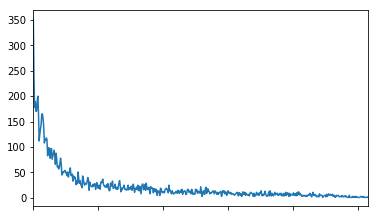

In [251]:
user_first_buyback.groupby(user_first_buyback.values).count().plot()

居然呈现指数衰减，莫非和熵有什么联系？

---
小总结：最近事情比较多，这些也就是花了一晚上赶出来的，挺怀念Excel...